In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
import re
# import contractions
import string
from bs4 import BeautifulSoup
# import requests
# from collections import Counter
# from num2words import num2words
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import word_tokenize
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
# import spacy
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
# import datasets
import nltk
import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from google.colab import drive
drive.mount('/content/drive')

pd.set_option('max_colwidth', 99999)
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/post_info.txt')
data=pd.read_csv('/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/post_info.txt', sep='\t', header=None, names=['id','user' ,'is_sp','json_p' , 'img_p'])
data.head()

,id,user,is_sp,json_p,img_p
0,0,alisasia,1,1309041812857818435.json,['1309041812857818435.jpg']
1,1,alisasia,0,1311846669234786866.json,['1311846669234786866.jpg']
2,2,alisasia,0,1315560311952470229.json,['1315560311952470229.jpg']
3,3,alisasia,0,1318531733175899446.json,['1318531733175899446.jpg']
4,4,alisasia,0,1343280729400051114.json,['1343280729400051114.jpg']


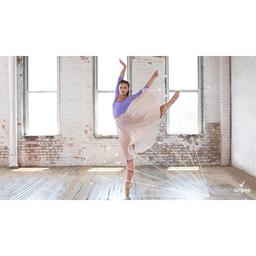

In [ ]:
from IPython.display import Image
Image('/content/img_resized/1000147795992383306.jpg')

In [ ]:
!unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/profiles_influencers.zip'
!ls -lat

Streaming output truncated to the last 5000 lines.
  inflating: users_influencers_SPOD/alyssataliaferro  
  inflating: users_influencers_SPOD/shadesofchey  
  inflating: users_influencers_SPOD/sweet_shelly_88  
  inflating: users_influencers_SPOD/thedeadlift  
  inflating: users_influencers_SPOD/claudelhy  
  inflating: users_influencers_SPOD/iamcharlotteolivia  
  inflating: users_influencers_SPOD/darlenerawrs  
  inflating: users_influencers_SPOD/ellahopem  
  inflating: users_influencers_SPOD/thejuanfangio  
  inflating: users_influencers_SPOD/rebekahmarine  
  inflating: users_influencers_SPOD/kisslifehelllo  
  inflating: users_influencers_SPOD/lippie143  
  inflating: users_influencers_SPOD/allureoftravel  
  inflating: users_influencers_SPOD/harrisonbeach  
  inflating: users_influencers_SPOD/fiberflux  
  inflating: users_influencers_SPOD/jordanunderwood  
  inflating: users_influencers_SPOD/morghan_rawls  
  inflating: users_influencers_SPOD/briantron  
  inflating: users_infl

In [ ]:
df =pd.read_csv('/content/users_influencers_SPOD/abbyevans', sep='\t', header=None, names=['username','followers' ,'followees','post' , 'url', 't/f', 'category','bio','email', 'phone', 'profile pic'])
df

,username,followers,followees,post,url,t/f,category,bio,email,phone,profile pic
0,Abby Evans,1888,639,513,NaN,False,NaN,"super fre$h, think different 🍒",NaN,NaN,https://scontent-lax3-1.cdninstagram.com/vp/2155283dbc84d128f3abcd37c801f68b/5C51DCC4/t51.2885-19/s320x320/41138828_729973617341894_4250316317774577664_n.jpg


In [ ]:
from os import listdir
from os.path import isfile, join
# onlyfiles = [f for f in listdir('/content/users_brands_SPOD/') if isfile(join(mypath, f))]
# listdir('/content/users_brands_SPOD/')

In [ ]:
not_available = pd.DataFrame(columns=['filename','username','followers' ,'followees','post' , 'url', 't/f', 'category','bio','email', 'phone', 'profile pic'])
available = pd.DataFrame(columns=['filename','username','followers' ,'followees','post' , 'url', 't/f', 'category','bio','email', 'phone', 'profile pic'])
root = '/content/users_influencers_SPOD/'
for file in tqdm(listdir(root)):
  # print(root+file)
  # df =pd.read_csv(root+file , sep='\t', header=None, names=['username','followers' ,'followees','post' , 'url', 't/f', 'category','bio','email', 'phone', 'profile pic'],error_bad_lines=False)
  with open(root+file, 'r') as path:
      lines = path.readlines()

  content = []
  for line in lines:
      values = line.strip().split('\t')
      content.append(values)
  try:
    df = pd.DataFrame(content,columns=['username','followers' ,'followees','post' , 'url', 't/f', 'category','bio','email', 'phone', 'profile pic'])
  except:
    print(root+file)

  df['filename'] = file
  if data[data['user']==file].shape[0] != 0:
    available = available.append(df, ignore_index=True)
  else:
    not_available = not_available.append(df,ignore_index = True)

 64%|██████▎   | 24205/38113 [1:02:59<38:24,  6.03it/s]

/content/users_influencers_SPOD/beautiful_around.us


100%|██████████| 38113/38113 [1:43:16<00:00,  6.15it/s]


In [ ]:
not_available.shape

(0, 12)

In [ ]:
available.shape

(38113, 12)

In [ ]:
not_available.head()

,filename,username,followers,followees,post,url,t/f,category,bio,email,phone,profile pic


In [ ]:
available[available['filename'].str.contains('beautiful_around')]

,filename,username,followers,followees,post,url,t/f,category,bio,email,phone,profile pic
24204,beautiful_around.us,J A L I S A,39642,1713,838,https://www.youtube.com/watch?v=MLWG3KfCb0o,True,Creators & Celebrities,❣️Influencer | Natural Hair & Beauty ❣️69k+ Subbies ❣️Email | iMadameJay@gmail.com Watch My Latest Video↓↓,imadamejay@gmail.com,NULL,https://scontent-lax3-1.cdninstagram.com/vp/c6140c37aacd8d78d6e338b4c2c00ca0/5C5D60FC/t51.2885-19/s320x320/41421628_243272766371458_6467913176577998848_n.jpg


In [ ]:
not_available.to_csv('/content/drive/MyDrive/ML Caption Craft/not_available_influencers.csv')
available.to_csv('/content/drive/MyDrive/ML Caption Craft/available_influencers.csv')